# **Задание**

Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.

Описание задания:
В домашнем задании нужно решить задачу классификации точек наиболее эффективно. Для этого в работе необходимо применить различные методы по отбору признаков. Отбор признаков предпочтительнее осуществлять основываясь на математическом аппарате, поэтому данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

Этапы работы:
1. Сгенерируйте данные с помощью кода:
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification(scale=1)

2. Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:
cross_val_score(LogisticRegression(), x, y, scoring=‘accuracy’).mean()

3. Используйте статистические методы для отбора признаков:
     - a) Выберите признаки на основе матрицы корреляции.
     - b) Отсеките низковариативные признаки (VarianceThreshold).
     - c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

4. Осуществите отбор признаков на основе дисперсионного анализа:
    - a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации f_classif (SelectKBest(f_classif, k=5)).
    - b) Повторите п. 2 на отобранных признаках.

5. Отбор с использованием моделей:
     - a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.
     - b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.
     - c) Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

6. Перебор признаков:
     - a) SequentialFeatureSelector.
     - b) Повторите п. 2 на отобранных признаках.

7. Сформулируйте выводы по проделанной работе:
     - a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SequentialFeatureSelector

In [18]:
df_score = pd.DataFrame(
    columns=[
        "model",
        "quality metric",
        "feature selection",
        "accuracy",
    ]
)

# 1. Сгенерируйте данные

In [19]:
x_gen, y_gen = make_classification(scale=1, random_state=24)

df = pd.DataFrame(x_gen)
df["y"] = y_gen

# 2. Постройте модель логистической регрессии и оцените среднюю точность

In [20]:
score = cross_val_score(LogisticRegression(), x_gen, y_gen, scoring="accuracy").mean()

df_score.loc[len(df_score)] = [
    "LogisticRegression()",
    x_gen.shape[1],
    "[0:20]",
    score,
]

df_score

,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81


# 3. Используйте статистические методы для отбора признаков:

## - a) Выберите признаки на основе матрицы корреляции.

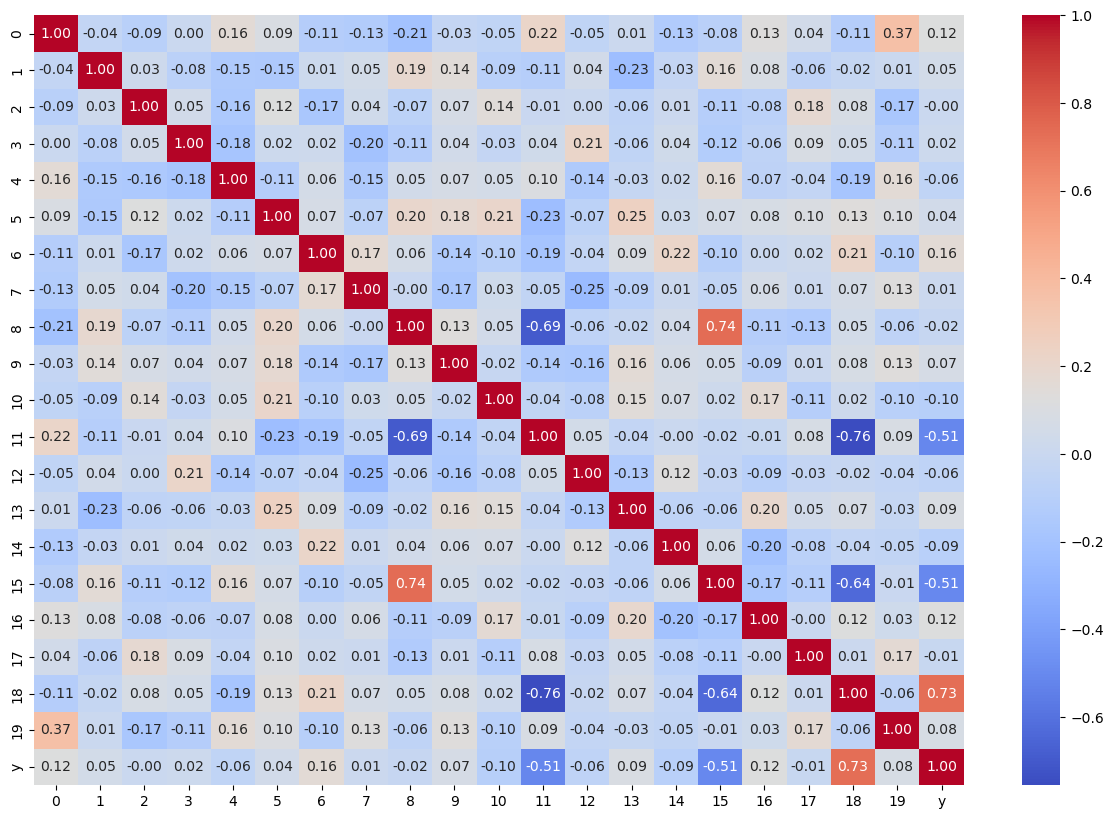

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

На основе матрицы оставлю признаки > 0,2 (модуль), т.е = [1, 5 , 6, 7, 14]

In [22]:
x_corr_matrix = [11, 15, 18]

score = cross_val_score(
    LogisticRegression(), df[x_corr_matrix], df["y"], scoring="accuracy"
).mean()

df_score.loc[len(df_score)] = [
    "LogisticRegression() with correlation matrix",
    df[x_corr_matrix].shape[1],
    df[x_corr_matrix].columns.tolist(),
    score,
]

df_score

,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86


## - b) Отсеките низковариативные признаки (VarianceThreshold).

In [23]:
from sklearn.feature_selection import VarianceThreshold
import statistics

variances = [statistics.variance(x) for x in x_gen]

selector = VarianceThreshold(threshold=np.mean(variances))
X = selector.fit_transform(x_gen)
columns = selector.get_support(indices=True)

score = cross_val_score(LogisticRegression(), X, y_gen, scoring="accuracy").mean()

In [24]:
df_score.loc[len(df_score)] = [
    "VarianceThreshold",
    X.shape[1],
    columns,
    score,
]

df_score


,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86
2,VarianceThreshold,4,"[8, 11, 15, 18]",0.85


Для подбора threshold используем усредненный variances, т.к. низкое (около нулевое или нулевое дефолтное значение) вовсе не отсеивает признакам, а максимальное (1.6+ для данных данных) вовсе удаляет все признаки

# 4. Осуществите отбор признаков на основе дисперсионного анализа:

##    - a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest


# Выбираем 5 лучших признаков
selector_kbest = SelectKBest(f_classif, k=5)
X = selector_kbest.fit_transform(x_gen, y_gen)
columns = selector_kbest.get_support(indices=True)

# Повторяем п. 2 на отобранных признаках
score = cross_val_score(LogisticRegression(), X, y_gen, scoring="accuracy").mean()

Отбор SelectKBest совпал с выбранными по матрице признаками, т.е колонки [1, 5, 6, 7, 14]

In [26]:
df_score.loc[len(df_score)] = [
    "SelectKBest",
    X.shape[1],
    columns,
    score,
]

df_score


,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86
2,VarianceThreshold,4,"[8, 11, 15, 18]",0.85
3,SelectKBest,5,"[6, 11, 15, 16, 18]",0.85


# 5. Отбор с использованием моделей:

##     - a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию.

In [ ]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(
    estimator=LogisticRegression(penalty="l1", solver="liblinear", random_state=42)
)
X = sfm.fit_transform(x_gen, y_gen)
columns = sfm.get_support(indices=True)

score = cross_val_score(LogisticRegression(), X, y_gen, scoring="accuracy").mean()

In [28]:
df_score.loc[len(df_score)] = [
    "SelectFromModel with LR",
    X.shape[1],
    columns,
    score,
]

df_score

,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86
2,VarianceThreshold,4,"[8, 11, 15, 18]",0.85
3,SelectKBest,5,"[6, 11, 15, 16, 18]",0.85
4,SelectFromModel with LR,12,"[0, 1, 2, 3, 4, 5, 10, 11, 13, 17, 18, 19]",0.82


##     - b) Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_gen, y_gen)

rf_sfm = SelectFromModel(estimator=rf)

X = rf_sfm.fit_transform(x_gen, y_gen)
columns = rf_sfm.get_support(indices=True)

score = cross_val_score(LogisticRegression(), X, y_gen, scoring="accuracy").mean()

In [30]:
df_score.loc[len(df_score)] = [
    "SelectFromModel with RFC",
    X.shape[1],
    columns,
    score,
]

df_score

,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86
2,VarianceThreshold,4,"[8, 11, 15, 18]",0.85
3,SelectKBest,5,"[6, 11, 15, 16, 18]",0.85
4,SelectFromModel with LR,12,"[0, 1, 2, 3, 4, 5, 10, 11, 13, 17, 18, 19]",0.82
5,SelectFromModel with RFC,4,"[8, 11, 15, 18]",0.85


# 6. Перебор признаков:

##     - a) SequentialFeatureSelector.

In [31]:
rf_sfs = SequentialFeatureSelector(estimator=rf)

X = rf_sfs.fit_transform(x_gen, y_gen)
columns = rf_sfs.get_support(indices=True)

score = cross_val_score(LogisticRegression(), X, y_gen, scoring="accuracy").mean()

In [32]:
df_score.loc[len(df_score)] = [
    "SequentialFeatureSelector",
    X.shape[1],
    columns,
    score,
]

df_score


,model,quality metric,feature selection,accuracy
0,LogisticRegression(),20,[0:20],0.81
1,LogisticRegression() with correlation matrix,3,"[11, 15, 18]",0.86
2,VarianceThreshold,4,"[8, 11, 15, 18]",0.85
3,SelectKBest,5,"[6, 11, 15, 16, 18]",0.85
4,SelectFromModel with LR,12,"[0, 1, 2, 3, 4, 5, 10, 11, 13, 17, 18, 19]",0.82
5,SelectFromModel with RFC,4,"[8, 11, 15, 18]",0.85
6,SequentialFeatureSelector,10,"[0, 1, 2, 3, 4, 10, 11, 12, 14, 18]",0.84


# Выводы:

Для данного случайного и зафиксированного набора данных:

- Лучше всех справился с отбором признаков конечно же я, используя матрицу.

**Модели:**
- Что касается моделей, то если обобщенно, то они всегда включали сильные признаки. 
- В зависимости от выбора параметров каждая модель в дополнении к сильным признакам подмешивает более слабые признаки

**Но:**
- С учетом генеративного набора, все модели улучшили показатели и исключили основные плохо влияющие на score признаки.